In [1]:
!pip install fitz
!pip install PyPDF2
!pip install Pillow
!pip install pytesseract

In [2]:
!pip install --upgrade pip
!pip install -U PyMuPDF

In [3]:
import fitz

pdffile = "./pdfs/1.pdf"
doc = fitz.open(pdffile)

for i in range(1000):
    try:
        print(i)
        page = doc.loadPage(i)
        pix = page.getPixmap()
        output = "../outputs/outfile" + str(i) + ".png"
        pix.writePNG(output)
    except ValueError:
        break
print("Done !")

0
1
2
3
Done !


Deprecation: 'loadPage' removed from class 'Document' after v1.19.0 - use 'load_page'.
Deprecation: 'getPixmap' removed from class 'Page' after v1.19.0 - use 'get_pixmap'.
Deprecation: 'writePNG' removed from class 'Pixmap' after v1.19.0 - use 'save'.


In [4]:
import PyPDF2
FILE_PATH = './pdfs/TU.pdf'

with open(FILE_PATH, mode='rb') as f:
    reader = PyPDF2.PdfFileReader(f)
    page = reader.getPage(10)
    print(page.extractText())

In [5]:
!pip install spacy
!pip install blackstone
!pip install https://blackstone-model.s3-eu-west-1.amazonaws.com/en_blackstone_proto-0.0.1.tar.gz
!pip install lexnlp

     |████████████████████████████████| 149 kB 6.9 MB/s 
  Attempting uninstall: certifi
    Found existing installation: certifi 2016.9.26
ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2016.9.26
ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
^C
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2016.9.26
ERROR: Cannot uninstall 'certifi'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [8]:
!pip install --upgrade pandas
!pip install --upgrade numpy

  Using cached numpy-1.21.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.


In [9]:
! apt install tesseract-ocr
! apt install libtesseract-dev
!pip install pytesseract

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [6]:
import pytesseract
from PIL import Image
a = pytesseract.image_to_string(Image.open("../outputs/scr1.png"), lang="eng")
print(a)

PREFACE

Trade Unions have proliferated due to rapid economic development and
development in particular. The setting of industrial units involving wide spread use
of machinery, changes in working and living environment of workers,
concentration of industries in large towns have brought the workers together to
maintain and improve their bargaining power and hence their employment
conditions. The first organized Trade Unions in India named as the Madras
Labour Union was formed as early as 1918. Since then, a large number of Unions
came up in almost all the industrial centers of the country. The government of
India passed the “Trade Unions Act,1926” to regulate conditions governing the
registration of Trade Unions, obligations imposed on a registered Trade Unions
and right and liabilities there of. The Rules Framed under the “Trade Unions
Act,1926 impose obligation on the registered Trade Unions (Workers &
Employers) to submit annual statutory retum in the prescribed format to the
Registr

In [7]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import networkx as nx
nltk.download('stopwords')    
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shabarish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/shabarish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
def cleaner(text):        
  sentences =[]        
  sentences = sent_tokenize(text)    
  for s in range(len(sentences)):
    ss = sentences[s]
    ss = re.sub(r'/.+?/', '', ss)
    ss = re.sub("[\(\[].*?[\)\]]", "", ss)
    sentences[s] = ss                      
  #print("\n".join(map(str,sentences)))
  #print("\n\n\n")
  return sentences


def sim_matrix(sentences,stop_words):
  similarity_matrix = np.zeros((len(sentences),len(sentences)))
  for idx1 in range(len(sentences)):
    for idx2 in range(len(sentences)):
      if idx1!=idx2:
        similarity_matrix[idx1][idx2] = cosfunction(sentences[idx1],sentences[idx2],stop_words)
  return similarity_matrix


def cosfunction(s1,s2,stopwords=None):    
  if stopwords is None:        
    stopwords = []        
  s1 = [w.lower() for w in s1]    
  s2 = [w.lower() for w in s2]
        
  all_words = list(set(s1 + s2))   
     
  vector1 = [0] * len(all_words)    
  vector2 = [0] * len(all_words)        
  for w in s1:        
    if not w in stopwords:
      vector1[all_words.index(w)]+=1                                                             
  for w in s2:        
    if not w in stopwords:            
      vector2[all_words.index(w)]+=1 
               
  return 1-cosine_distance(vector1,vector2)

def generate_summary(text,top_n):
  stop_words = stopwords.words('english')    
  summary = []
  sentences = cleaner(text)
  cos_matrix = sim_matrix(sentences,stop_words)
  cos_graph = nx.from_numpy_array(cos_matrix)
  scores = nx.pagerank(cos_graph)
  ranks = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)
  
  for i in range(top_n):
    summary.append(ranks[i][1])
  return " ".join(summary),len(sentences)

In [9]:
a = a.replace('\n', " ")
a

'PREFACE  Trade Unions have proliferated due to rapid economic development and development in particular. The setting of industrial units involving wide spread use of machinery, changes in working and living environment of workers, concentration of industries in large towns have brought the workers together to maintain and improve their bargaining power and hence their employment conditions. The first organized Trade Unions in India named as the Madras Labour Union was formed as early as 1918. Since then, a large number of Unions came up in almost all the industrial centers of the country. The government of India passed the “Trade Unions Act,1926” to regulate conditions governing the registration of Trade Unions, obligations imposed on a registered Trade Unions and right and liabilities there of. The Rules Framed under the “Trade Unions Act,1926 impose obligation on the registered Trade Unions (Workers & Employers) to submit annual statutory retum in the prescribed format to the Regist

In [10]:
g = generate_summary(a,4)[0].strip('\n')
with open("../outputs/summary.txt", "w") as text_file:
    text_file.write("Summary: %s" % g)
g

'The Rules Framed under the “Trade Unions Act,1926 impose obligation on the registered Trade Unions  to submit annual statutory retum in the prescribed format to the Registrar of their respective States/ Union Territories. Authorities in turn furnish the consolidated data in respect of the entire State/U.T. 1am thankful to the Registrar of Trade Unions of all the responding State Government/Union Territory without, whose support it would not have been possible to bring out this Report. It is based on the Annual Returns received from the Registrar of Trade Unions of the respective States/Union Territories.'

In [11]:
bb = a.split('.')
bb

['PREFACE  Trade Unions have proliferated due to rapid economic development and development in particular',
 ' The setting of industrial units involving wide spread use of machinery, changes in working and living environment of workers, concentration of industries in large towns have brought the workers together to maintain and improve their bargaining power and hence their employment conditions',
 ' The first organized Trade Unions in India named as the Madras Labour Union was formed as early as 1918',
 ' Since then, a large number of Unions came up in almost all the industrial centers of the country',
 ' The government of India passed the “Trade Unions Act,1926” to regulate conditions governing the registration of Trade Unions, obligations imposed on a registered Trade Unions and right and liabilities there of',
 ' The Rules Framed under the “Trade Unions Act,1926 impose obligation on the registered Trade Unions (Workers & Employers) to submit annual statutory retum in the prescribed

In [12]:
import spacy

# Load the model
nlp = spacy.load("en_blackstone_proto")
from spacy import displacy
from blackstone.displacy_palette import ner_displacy_options
with open("../outputs/terms.txt", "w") as text_file:
    text_file.write("Important terms: \n")
for i in bb:
    doc = nlp(i)
# Call displacy and pass `ner_displacy_options` into the option parameter`
    if doc.ents != ():
       print(doc.ents[0])
       with open("../outputs/terms.txt", "a") as text_file:
         text_file.write("%s \n" %doc.ents[0])
    else:
       pass

Rules Framed
Trade Unions Act
Dalject Singh Director General


In [13]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/shabarish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/shabarish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from lexnlp.extract.en.acts import get_acts as aa
from lexnlp.extract.en.amounts import get_amounts as ab
from lexnlp.extract.en.citations import get_citations as ac
from lexnlp.extract.en.conditions import get_conditions as ae
from lexnlp.extract.en.constraints import get_constraints as af
from lexnlp.extract.en.copyright import get_copyright as ag
from lexnlp.extract.en.courts import get_courts as ah
from lexnlp.extract.en.dates import get_dates as ai
from lexnlp.extract.en.definitions import get_definitions as aj
from lexnlp.extract.en.distances import get_distances as ak
from lexnlp.extract.en.durations import get_durations as al
from lexnlp.extract.en.geoentities import get_geoentities as am
from lexnlp.extract.en.money import get_money as an
from lexnlp.extract.en.percents import get_percents as ao
from lexnlp.extract.en.ratios import get_ratios as aq
from lexnlp.extract.en.regulations import get_regulations as ar
from lexnlp.extract.en.trademarks import get_trademarks as au

with open("./outputs/insg.txt", "w") as text_file:
    text_file.write("INSIGHTS: \n")

for i in bb:
    if list(aa(i)) != []:
      print(list(aa(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(aa(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(ab(i)) != []:
      print(list(ab(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ab(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(ac(i)) != []:
      print(list(ac(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ac(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(ae(i)) != []:
      print(list(ae(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ae(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(af(i)) != []:
      print(list(af(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(af(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(ag(i)) != []:
      print(list(ag(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ag(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
   
    elif list(ai(i)) != []:
      print(list(ai(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ai(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(aj(i)) != []:
      print(list(aj(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(aj(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(ak(i)) != []:
      print(list(ak(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ak(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(al(i)) != []:
      print(list(al(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(al(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    
    elif list(an(i)) != []:
      print(list(an(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(an(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(ao(i)) != []:
      print(list(ao(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ao(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(aq(i)) != []:
      print(list(aq(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(aq(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(ar(i)) != []:
      print(list(ar(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(ar(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")
    elif list(au(i)) != []:
      print(list(au(i)))
      with open("./outputs/insg.txt", "a") as text_file:
        text_file.write("%s\n"%str(list(au(i))))
    
      with open("./outputs/insg.txt", "a") as text_file: 
        text_file.write("\n\n")

[Decimal('1.0'), Decimal('1918.0')]
[{'location_start': 37, 'location_end': 54, 'act_name': 'Trade Unions Act', 'section': '', 'year': '', 'ambiguous': False, 'value': 'Trade Unions Act,'}]
[{'location_start': 29, 'location_end': 46, 'act_name': 'Trade Unions Act', 'section': '', 'year': '', 'ambiguous': False, 'value': 'Trade Unions Act,'}]
[{'location_start': 90, 'location_end': 108, 'act_name': 'Trade Unions Act', 'section': '', 'year': '', 'ambiguous': False, 'value': 'Trade Unions Act, '}]
[Decimal('4.0'), Decimal('2015.0')]


In [17]:
test = a
test = ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ', test ))
test


'PREFACE  Trade Unions have proliferated due to rapid economic development and development in particular The setting of industrial units involving wide spread use of machinery changes in working and living environment of workers concentration of industries in large towns have brought the workers together to maintain and improve their bargaining power and hence their employment conditions The first organized Trade Unions in India named as the Madras Labour Union was formed as early as 1918 Since then a large number of Unions came up in almost all the industrial centers of the country The government of India passed the Trade Unions Act1926 to regulate conditions governing the registration of Trade Unions obligations imposed on a registered Trade Unions and right and liabilities there of The Rules Framed under the Trade Unions Act1926 impose obligation on the registered Trade Unions Workers  Employers to submit annual statutory retum in the prescribed format to the Registrar of their resp

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(test)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

#test = " ".join(map(str,tokens_without_sw))
test = tokens_without_sw

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shabarish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
tt = [i for i in test if i != '']
tagged = nltk.pos_tag(tt)
tagged

[('PREFACE', 'NNP'),
 ('Trade', 'NNP'),
 ('Unions', 'NNP'),
 ('proliferated', 'VBD'),
 ('due', 'JJ'),
 ('rapid', 'JJ'),
 ('economic', 'JJ'),
 ('development', 'NN'),
 ('development', 'NN'),
 ('particular', 'IN'),
 ('The', 'DT'),
 ('setting', 'VBG'),
 ('industrial', 'JJ'),
 ('units', 'NNS'),
 ('involving', 'VBG'),
 ('wide', 'JJ'),
 ('spread', 'NN'),
 ('use', 'NN'),
 ('machinery', 'NN'),
 ('changes', 'NNS'),
 ('working', 'VBG'),
 ('living', 'NN'),
 ('environment', 'NN'),
 ('workers', 'NNS'),
 ('concentration', 'NN'),
 ('industries', 'NNS'),
 ('large', 'JJ'),
 ('towns', 'NNS'),
 ('brought', 'VBD'),
 ('workers', 'NNS'),
 ('together', 'RB'),
 ('maintain', 'VBP'),
 ('improve', 'VB'),
 ('bargaining', 'VBG'),
 ('power', 'NN'),
 ('hence', 'NN'),
 ('employment', 'NN'),
 ('conditions', 'NNS'),
 ('The', 'DT'),
 ('first', 'JJ'),
 ('organized', 'VBN'),
 ('Trade', 'NNP'),
 ('Unions', 'NNP'),
 ('India', 'NNP'),
 ('named', 'VBD'),
 ('Madras', 'NNP'),
 ('Labour', 'NNP'),
 ('Union', 'NNP'),
 ('formed', 'V

In [20]:
from collections import Counter

f = []
for i in tagged:
  if i[1] == 'NN' or i[1] == 'VBD' or i[1] == 'VBG' or i[1] == 'DT' or i[1] == 'JJ' or i[1] == 'RB' or i[1] == 'PRP' or i[1] == 'IN' or i[1]=="WP$" or i[1]=="VBZ":
    continue
  else:
    f.append(i[0])
unique_words = set(f)
fcount = {}
for words in unique_words :
        fcount[words] = f.count(words)

c=Counter(fcount)
y = c.most_common()
yy = [i[0] for i in y[:20]]
yy

['Unions',
 'Trade',
 'Labour',
 'Bureau',
 'India',
 'Registrar',
 'Territories',
 'Union',
 'workers',
 'StateUT',
 'statistics',
 'Act1926',
 'conditions',
 'imposed',
 'turn',
 'Workers',
 'Returns',
 'units',
 '1am',
 'bring']

In [21]:
!pip install wordcloud

     |████████████████████████████████| 366 kB 6.6 MB/s 
     |████████████████████████████████| 11.5 MB 114 kB/s 
     |████████████████████████████████| 1.1 MB 12.0 MB/s 
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


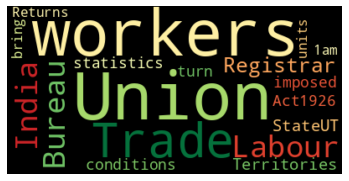

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap='RdYlGn').generate(" ".join(map(str,yy)))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('./outputs/cloud.png')


In [24]:
# try:
#     from googlesearch import search
# except ImportError:
#     print("No module named 'google' found")
# with open("../outputs/links.txt", "w") as text_file:
#         text_file.write("LINKS:\n")
# # to search
# query = " ".join(map(str,yy[:5]))
# print("Query - results for: ", query)
# for j in search(query, tld="co.in", num=10, stop=10, pause=2):
#     print(j)
#     with open("../outputs/links.txt", "a") as text_file:
#         text_file.write("%s\n"%str(j))

In [30]:
import requests
import urllib
import pandas as pd
from requests_html import HTML
from requests_html import HTMLSession
def get_source(url):
      try:
        session = HTMLSession()
        response = session.get(url)
        return response

      except requests.exceptions.RequestException as e:
        print(e)
def scrape_google(query):

    query = urllib.parse.quote_plus(query)
    response = get_source("https://www.google.co.uk/search?q=" + query)

    links = list(response.html.absolute_links)
    google_domains = ('https://www.google.', 
                      'https://google.', 
                      'https://webcache.googleusercontent.', 
                      'http://webcache.googleusercontent.', 
                      'https://policies.google.',
                      'https://support.google.',
                      'https://maps.google.')

    for url in links[:]:
        if url.startswith(google_domains):
            links.remove(url)

    return links
def get_results(query):
    
    query = urllib.parse.quote_plus(query)
    response = get_source("https://www.google.co.uk/search?q=" + query)
    
    return response
def parse_results(response):
    
    css_identifier_result = ".tF2Cxc"
    css_identifier_title = "h3"
    css_identifier_link = ".yuRUbf a"
    css_identifier_text = ".IsZvec"
    
    results = response.html.find(css_identifier_result)

    output = []
    
    for result in results:

        item = {
            'link': result.find(css_identifier_link, first=True).attrs['href'],
            'text': result.find(css_identifier_text, first=True).text
        }
        
        output.append(item)
        
    return output
def google_search(query):
    response = get_results(query)
    return parse_results(response)

query = " ".join(map(str,yy[:5]))
results = google_search(query)
results

[{'link': 'http://labourbureau.gov.in/TU%202k2%20Chapter%201.htm',
  'text': 'The first organised Trade Union in India named as the Madras Labour Union was formed in the year 1918. Since then a large number of unions sprang up in almost\xa0...'},
 {'link': 'http://labourbureau.gov.in/TU%202k2%20contents.htm',
  'text': "5. Federations of Workers' Trade Unions. 14-16. 6. Central Organisations and their membership. 16."},
 {'link': 'http://labourbureau.gov.in/TU%202k2%20Chapter%202.htm',
  'text': "TRADE UNIONS IN INDIA 2002. CHAPTER-II. 2. Growth of Trade Unions. 2.1 Growth of Trade Unions (Workers' & Employers' Combined)"},
 {'link': 'http://labourbureaunew.gov.in/Index.aspx/showdetail.aspx?pr_id=Y8XU9Y3T2FY%3D',
  'text': 'Labour Bureau Ministry of Labour and Employment, Government of India ... Publications/Reports >> Current Publications >> Trade Unions in India Reports.'},
 {'link': 'http://mospi.nic.in/sites/default/files/Statistical_year_book_india_chapters/Trade_Union.pdf',
  'te